Chapter 09

# 和给定矩形相切椭圆
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)



这段代码在二维平面上展示了一组随参数$\rho$变化而产生的渐变椭圆曲线，并在中心绘制一个虚线矩形用于对比。椭圆曲线的方程为：

$$
\frac{x^2}{m^2} - 2\rho \cdot \frac{x}{m} \cdot \frac{y}{n} + \frac{y^2}{n^2} = 1 - \rho^2
$$

其中$m$和$n$是椭圆的半长轴和半短轴，$\rho$为控制椭圆形状的参数，在范围$[-0.95, 0]$内变化。代码为每个$\rho$值绘制一个椭圆，将其颜色从红到蓝渐变，以突出形状的不同。

图中绘制了$x$轴和$y$轴作为对称轴，并在中心添加了一个与椭圆区域大小接近的虚线矩形，便于对比椭圆和矩形的变化情况。通过这种渐变椭圆图形，可以直观展示参数$\rho$对椭圆形状的影响。

## 导入所需库

In [1]:
import matplotlib.pyplot as plt  # 导入matplotlib库，用于绘图
import numpy as np  # 导入numpy库，用于数值计算
import matplotlib.patches as patches  # 导入patches，用于绘制形状

## 创建网格和参数

In [2]:
x = np.linspace(-4, 4, num=201)  # x轴坐标范围
y = np.linspace(-4, 4, num=201)  # y轴坐标范围
m = 1  # 矩形的长半轴
n = 1.5  # 矩形的短半轴

xx, yy = np.meshgrid(x, y)  # 生成二维网格

rho_array = np.linspace(-0.95, 0, num=20)  # 定义rho参数的范围

## 创建图形

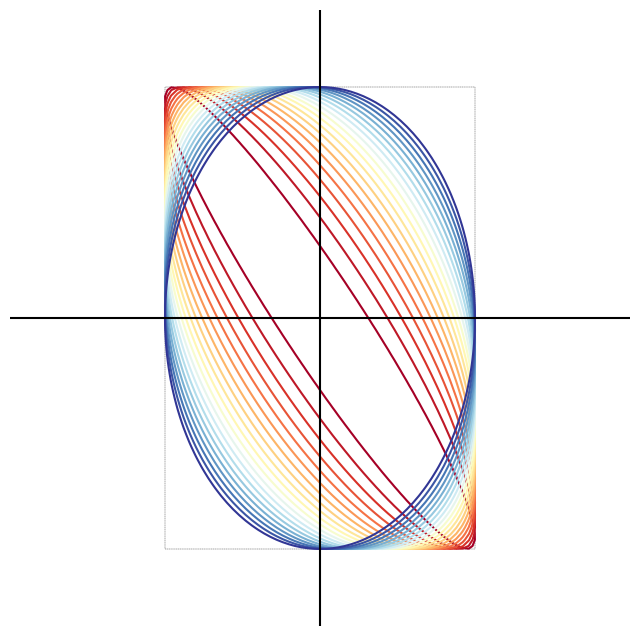

In [3]:
fig, ax = plt.subplots(figsize=(8, 8))  # 创建图形对象和坐标轴对象

## 添加矩形
rect = patches.Rectangle((-m, -n), 2 * m, 2 * n, 
                         linewidth=0.25, edgecolor='k',
                         linestyle='--',
                         facecolor='none')  # 创建矩形补丁
ax.add_patch(rect)  # 将矩形添加到坐标轴中

colors = plt.cm.RdYlBu(np.linspace(0, 1, len(rho_array)))  # 定义颜色渐变

## 绘制椭圆等高线
for i in range(0, len(rho_array)):
    rho = rho_array[i]  # 获取当前rho值
    ellipse = ((xx/m)**2 - 2 * rho * (xx/m) * (yy/n) + (yy/n)**2) / (1 - rho**2)  # 椭圆方程
    color_code = colors[i, :].tolist()  # 获取当前颜色
    plt.contour(xx, yy, ellipse, levels=[1], colors=[color_code])  # 绘制等高线

## 设置坐标轴和边界样式
plt.axvline(x=0, color='k', linestyle='-')  # 绘制y轴
plt.axhline(y=0, color='k', linestyle='-')  # 绘制x轴
ax.set_xticks([])  # 移除x轴刻度
ax.set_yticks([])  # 移除y轴刻度
ax.set_xlim([-2, 2])  # 设置x轴范围
ax.set_ylim([-2, 2])  # 设置y轴范围

ax.spines['top'].set_visible(False)  # 隐藏顶部边框
ax.spines['right'].set_visible(False)  # 隐藏右侧边框
ax.spines['bottom'].set_visible(False)  # 隐藏底部边框
ax.spines['left'].set_visible(False)  # 隐藏左侧边框